<h1><center>Практическая работа 6</center></h1>
<h1><center>Оценка потерь на трассе радиоканала в случает дифракции на цилиндре</center></h1>
<h4>Выполнил Дмитриев Егор ИКТУ-88 Вариант 3</h4>

### Цель работы: 
>Целью данной работы является ознакомление с механизмом дифракции радиосигала на цилиндре, в также принципами оценки величины потерь, вызываемых данным типом дифракции

### 1. Выбор значений по номеру варианта 
$ f = 1000 МГц; h_T = 58 м; h_R = 35м; a = 5км; b = 5км; H' = 62м; D_S = 21м $

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math

f = 1000
hT = 58
hR = 35
H_ne = 62
Ds = 21

In [69]:
b = 5000
k = 1000
a = np.zeros(10,)
for i in range(10,):
    a[i] = k
    k += 1000

In [70]:
Llos = np.zeros(10,)
for i in range(10):
    Llos[i] = 42.6 + 26*math.log10((a[i]*10**-3)+(b*10**-3)) + 20*math.log10(f)
    print('Llos = ',Llos[i], 'дБ')

Llos =  122.83193250997473 дБ
Llos =  124.57254904037067 дБ
Llos =  126.08033966179053 дБ
Llos =  127.41030524542245 дБ
Llos =  128.6 дБ
Llos =  129.67620981411386 дБ
Llos =  130.65871239723825 дБ
Llos =  131.56252715997775 дБ
Llos =  132.3993289276342 дБ
Llos =  133.1783727354477 дБ


In [71]:
Ldif_1 = np.zeros(10,)
Ldif_1_65 = np.zeros(10,)
d = np.zeros(10,)
lambd = (3*10**8)/(f*10**6)
for i in range(10):
    d_1 = (a[i]*10**-3)+(b*10**-3)
    h0 = ((a[i]*10**-3)*(d_1-(a[i]*10**-3)))/17
    H = H_ne + h0
    d1 = math.sqrt(a[i]**2+(H-hT)**2)
    d2 = math.sqrt(b**2+(H-hR)**2)
    d[i] = d1+d2
    beta1 = math.acos((H-hT)/d1)
    beta2 = math.acos((H-hR)/d2)
    beta = beta1 + beta2
    alpha = (180*(math.pi/180))-beta
    r = (2*Ds*a[i]*b)/(alpha*((a[i]**2) + (b**2)))
    Lr = 11.7 * alpha * math.sqrt((math.pi*r)/lambd)
    h = H - (hT+a[i]*((hR-hT)/(a[i]+b)))
    v = h*math.sqrt((2/lambd)*(1/d1+1/d2))
    if (v > - 0.7):
        Lwdg = 6.9 + 20*math.log10(math.sqrt((v-0.1)**2+1)+v-0.1)
    else:
        Lwdg = 0
    
    Ldif_1[i] = Lwdg + Lr
    Ldif_1_65[i] = Lwdg + (Lr*0.65)
    print('Ldif_1 = ',Ldif_1[i], 'дБ')
    print('Ldif_1_65 = ',Ldif_1_65[i], 'дБ')

Ldif_1 =  22.666661691167157 дБ
Ldif_1_65 =  18.947396067794486 дБ
Ldif_1 =  25.033690963792004 дБ
Ldif_1_65 =  20.576443260998353 дБ
Ldif_1 =  26.440424129845937 дБ
Ldif_1_65 =  21.59890409274702 дБ
Ldif_1 =  27.140526853082058 дБ
Ldif_1_65 =  22.147519307809706 дБ
Ldif_1 =  27.39763711491195 дБ
Ldif_1_65 =  22.39436269619939 дБ
Ldif_1 =  27.39899102622259 дБ
Ldif_1_65 =  22.464205323641572 дБ
Ldif_1 =  27.262510484748255 дБ
Ldif_1_65 =  22.436261899348207 дБ
Ldif_1 =  27.057992328308067 дБ
Ldif_1_65 =  22.35779442827257 дБ
Ldif_1 =  26.825292487424743 дБ
Ldif_1_65 =  22.256085192999713 дБ
Ldif_1 =  26.5865669091909 дБ
Ldif_1_65 =  22.146543790818576 дБ


In [72]:
Ldif_2 = np.zeros(10,)
Ldif_2_65 = np.zeros(10,)
for i in range(10):
    pl = math.sqrt(((a[i]+b)**2)+(hT-hR)**2)
    Hbeam = ((b*hT) + (a[i]*hR))/(a[i]+b)
    d_1 = (a[i]*10**-3)+(b*10**-3)
    h0 = ((a[i]*10**-3)*(d_1-(a[i]*10**-3)))/17
    H = H_ne + h0
    F = Hbeam - H
    F1 = 17.31 * math.sqrt((1/(f*10**-3)) * (((a[i]*10**-3) * (b*10**-3))/((a[i]*10**-3)+(b*10**-3))))
    x = F/F1
    Lsph = -38.68 * x + 21.66
    if (x >= -0.5):
        Lwdg = (1.377 * (x**2)) - (11.31 * x) + 6
    else:
        Lwdg = -50.4/(1.6 - x) + 36
    Ldif_2[i] = Lwdg + (Lsph - Lwdg)
    Ldif_2_65[i] = Lwdg + 0.65 * (Lsph - Lwdg)
    print('Ldif_2 = ',Ldif_2[i], 'дБ')
    print('Ldif_2_65 = ',Ldif_2_65[i], 'дБ')


Ldif_2 =  41.55456187248056 дБ
Ldif_2_65 =  31.26742503375519 дБ
Ldif_2 =  42.52361361498765 дБ
Ldif_2_65 =  31.99500872653232 дБ
Ldif_2 =  43.70240661022122 дБ
Ldif_2_65 =  32.87702903573745 дБ
Ldif_2 =  44.74232277330276 дБ
Ldif_2_65 =  33.65246851610975 дБ
Ldif_2 =  45.64370586182605 дБ
Ldif_2_65 =  34.322657725447854 дБ
Ldif_2 =  46.43520531514257 дБ
Ldif_2_65 =  34.909701318100495 дБ
Ldif_2 =  47.14205190580293 дБ
Ldif_2_65 =  35.43284770646841 дБ
Ldif_2 =  47.78334015947243 дБ
Ldif_2_65 =  35.9065883255324 дБ
Ldif_2 =  48.37317596637851 дБ
Ldif_2_65 =  36.34159209918985 дБ
Ldif_2 =  48.922029296909415 дБ
Ldif_2_65 =  36.745757901383584 дБ


<function matplotlib.pyplot.show(close=None, block=None)>

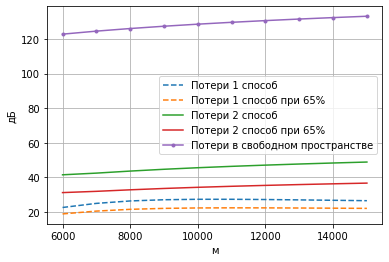

In [73]:
plt.plot(d, Ldif_1, '--', label = 'Потери 1 способ')
plt.plot(d, Ldif_1_65, '--', label = 'Потери 1 способ при 65%')
plt.plot(d, Ldif_2, '-', label = 'Потери 2 способ')
plt.plot(d, Ldif_2_65, '-', label = 'Потери 2 способ при 65%')
plt.plot(d, Llos, '.-', label = 'Потери в свободном пространстве')
plt.xlabel('м')
plt.ylabel('дБ')
plt.legend()
plt.grid()
plt.show

In [74]:
a = 5000
k = 1000
b = np.zeros(10,)
for i in range(10,):
    b[i] = k
    k += 1000

In [75]:
Llos = np.zeros(10,)
for i in range(10):
    Llos[i] = 42.6 + 26*math.log10((a*10**-3)+(b[i]*10**-3)) + 20*math.log10(f)
    print('Llos = ',Llos[i], 'дБ')

Llos =  122.83193250997473 дБ
Llos =  124.57254904037067 дБ
Llos =  126.08033966179053 дБ
Llos =  127.41030524542245 дБ
Llos =  128.6 дБ
Llos =  129.67620981411386 дБ
Llos =  130.65871239723825 дБ
Llos =  131.56252715997775 дБ
Llos =  132.3993289276342 дБ
Llos =  133.1783727354477 дБ


In [76]:
a = 5000
k = 1000
b = np.zeros(10,)
for i in range(10,):
    b[i] = k
    k += 1000

In [77]:
Llos = np.zeros(10,)
for i in range(10):
    Llos[i] = 42.6 + 26*math.log10((a*10**-3)+(b[i]*10**-3)) + 20*math.log10(f)
    print('Llos = ',Llos[i], 'дБ')

Llos =  122.83193250997473 дБ
Llos =  124.57254904037067 дБ
Llos =  126.08033966179053 дБ
Llos =  127.41030524542245 дБ
Llos =  128.6 дБ
Llos =  129.67620981411386 дБ
Llos =  130.65871239723825 дБ
Llos =  131.56252715997775 дБ
Llos =  132.3993289276342 дБ
Llos =  133.1783727354477 дБ


In [78]:
Ldif_1 = np.zeros(10,)
Ldif_1_65 = np.zeros(10,)
d = np.zeros(10,)
lambd = (3*10**8)/(f*10**6)
for i in range(10):
    d_1 = (a*10**-3)+(b[i]*10**-3)
    h0 = ((a*10**-3)*(d_1-(a*10**-3)))/17
    H = H_ne + h0
    d1 = math.sqrt(a**2+(H-hT)**2)
    d2 = math.sqrt(b[i]**2+(H-hR)**2)
    d[i] = d1+d2
    beta1 = math.acos((H-hT)/d1)
    beta2 = math.acos((H-hR)/d2)
    beta = beta1 + beta2
    alpha = (180*(math.pi/180))-beta
    r = (2*Ds*a*b[i])/(alpha*((a**2) + (b[i]**2)))
    Lr = 11.7 * alpha * math.sqrt((math.pi*r)/lambd)
    h = H - (hT+a*((hR-hT)/(a+b[i])))
    v = h*math.sqrt((2/lambd)*(1/d1+1/d2))
    if (v > - 0.7):
        Lwdg = 6.9 + 20*math.log10(math.sqrt((v-0.1)**2+1)+v-0.1)
    else:
        Lwdg = 0
    
    Ldif_1[i] = Lwdg + Lr
    Ldif_1_65[i] = Lwdg + (Lr*0.65)
    print('Ldif_1 = ',Ldif_1[i], 'дБ')
    print('Ldif_1_65 = ',Ldif_1_65[i], 'дБ')

Ldif_1 =  37.48407088268516 дБ
Ldif_1_65 =  31.165762592941093 дБ
Ldif_1 =  33.93073894924986 дБ
Ldif_1_65 =  27.814093179933124 дБ
Ldif_1 =  31.365127593187538 дБ
Ldif_1_65 =  25.58428657282836 дБ
Ldif_1 =  29.222072991098166 дБ
Ldif_1_65 =  23.83065926833187 дБ
Ldif_1 =  27.39763711491195 дБ
Ldif_1_65 =  22.39436269619939 дБ
Ldif_1 =  25.852477074314677 дБ
Ldif_1_65 =  21.207983915457223 дБ
Ldif_1 =  24.55122764367427 дБ
Ldif_1_65 =  20.22594042088469 дБ
Ldif_1 =  23.45773520741157 дБ
Ldif_1_65 =  19.41125291405284 дБ
Ldif_1 =  22.538053683493764 дБ
Ldif_1_65 =  18.733248711240208 дБ
Ldif_1 =  21.76247890174941 дБ
Ldif_1_65 =  18.166840218308252 дБ


In [79]:
Ldif_2 = np.zeros(10,)
Ldif_2_65 = np.zeros(10,)
for i in range(10):
    pl = math.sqrt(((a+b[i])**2)+(hT-hR)**2)
    Hbeam = ((b[i]*hT) + (a*hR))/(a+b[i])
    d_1 = (a*10**-3)+(b[i]*10**-3)
    h0 = ((a*10**-3)*(d_1-(a*10**-3)))/17
    H = H_ne + h0
    F = Hbeam - H
    F1 = 17.31 * math.sqrt((1/(f*10**-3)) * (((a*10**-3) * (b[i]*10**-3))/((a*10**-3)+(b[i]*10**-3))))
    x = F/F1
    Lsph = -38.68 * x + 21.66
    if (x >= -0.5):
        Lwdg = (1.377 * (x**2)) - (11.31 * x) + 6
    else:
        Lwdg = -50.4/(1.6 - x) + 36
    Ldif_2[i] = Lwdg + (Lsph - Lwdg)
    Ldif_2_65[i] = Lwdg + 0.65 * (Lsph - Lwdg)
    print('Ldif_2 = ',Ldif_2[i], 'дБ')
    print('Ldif_2_65 = ',Ldif_2_65[i], 'дБ')

Ldif_2 =  79.0878486861833 дБ
Ldif_2_65 =  58.28853862599169 дБ
Ldif_2 =  60.95209160473203 дБ
Ldif_2_65 =  45.475287866292625 дБ
Ldif_2 =  53.085728313646904 дБ
Ldif_2_65 =  39.79366747886665 дБ
Ldif_2 =  48.57304781759876 дБ
Ldif_2_65 =  36.48884201671211 дБ
Ldif_2 =  45.64370586182605 дБ
Ldif_2_65 =  34.322657725447854 дБ
Ldif_2 =  43.60602737173697 дБ
Ldif_2_65 =  32.80503646394956 дБ
Ldif_2 =  42.12645548236023 дБ
Ldif_2_65 =  31.69709241002086 дБ
Ldif_2 =  41.021937245293 дБ
Ldif_2_65 =  30.866527184859375 дБ
Ldif_2 =  40.18274130426991 дБ
Ldif_2_65 =  30.224913498678283 дБ
Ldif_2 =  39.53870759348372 дБ
Ldif_2_65 =  29.73282946155564 дБ


<function matplotlib.pyplot.show(close=None, block=None)>

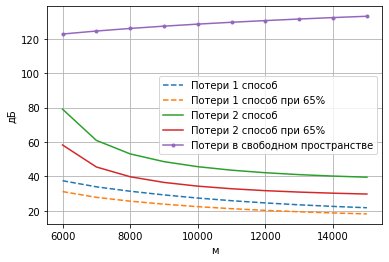

In [80]:
plt.plot(d, Ldif_1, '--', label = 'Потери 1 способ')
plt.plot(d, Ldif_1_65, '--', label = 'Потери 1 способ при 65%')
plt.plot(d, Ldif_2, '-', label = 'Потери 2 способ')
plt.plot(d, Ldif_2_65, '-', label = 'Потери 2 способ при 65%')
plt.plot(d, Llos, '.-', label = 'Потери в свободном пространстве')
plt.xlabel('м')
plt.ylabel('дБ')
plt.legend()
plt.grid()
plt.show